In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('data.csv')
df.head()



,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-09,Alabama,26657.0,423.0,18034.0,15390.0,1365.0,912,0.0,16.0,...,0.0,0.0,0.0,27.0,30.0,7.0,0.0,0.0,0.0,65900
1,2021-09,Alaska,174.0,13.0,2497.0,3094.0,310.0,173,0.0,1.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,6520
2,2021-09,Arizona,5962.0,780.0,18406.0,10477.0,1769.0,985,0.0,4.0,...,0.0,0.0,0.0,10.0,9.0,3.0,0.0,2.0,0.0,40033
3,2021-09,Arkansas,3259.0,719.0,6946.0,6783.0,495.0,388,1.0,6.0,...,0.0,0.0,0.0,8.0,3.0,0.0,0.0,1.0,0.0,20536
4,2021-09,California,17520.0,14442.0,37842.0,27880.0,6190.0,0,0.0,0.0,...,101.0,0.0,0.0,6793.0,2963.0,541.0,23.0,18.0,0.0,116704


# New Section

In [51]:
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15125 entries, 0 to 15124
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      15125 non-null  object 
 1   state                      15125 non-null  object 
 2   permit                     15101 non-null  float64
 3   permit_recheck             3740 non-null   float64
 4   handgun                    15105 non-null  float64
 5   long_gun                   15106 non-null  float64
 6   other                      8140 non-null   float64
 7   multiple                   15125 non-null  int64  
 8   admin                      15102 non-null  float64
 9   prepawn_handgun            13182 non-null  float64
 10  prepawn_long_gun           13180 non-null  float64
 11  prepawn_other              7755 non-null   float64
 12  redemption_handgun         13185 non-null  float64
 13  redemption_long_gun        13184 non-null  flo

In [52]:
  df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [53]:
df=df[~df.permit.isnull()].copy()
df.isnull().sum()
df=df[~df.admin.isnull()].copy()
df.isnull().sum()

month                            0
state                            0
permit                           0
permit_recheck               11359
handgun                          0
long_gun                         0
other                         6959
multiple                         0
admin                            0
prepawn_handgun               1920
prepawn_long_gun              1922
prepawn_other                 7344
redemption_handgun            1917
redemption_long_gun           1918
redemption_other              7344
returned_handgun             10261
returned_long_gun            10316
returned_other               10644
rentals_handgun              11469
rentals_long_gun             11634
private_sale_handgun          9709
private_sale_long_gun         9709
private_sale_other            9709
return_to_seller_handgun      9984
return_to_seller_long_gun     9709
return_to_seller_other       10204
totals                           0
dtype: int64

# New Section

In [ ]:
df.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-09,Alabama,26657.0,423.0,18034.0,15390.0,1365.0,912,0.0,16.0,...,0.0,0.0,0.0,27.0,30.0,7.0,0.0,0.0,0.0,65900
1,2021-09,Alaska,174.0,13.0,2497.0,3094.0,310.0,173,0.0,1.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,6520
2,2021-09,Arizona,5962.0,780.0,18406.0,10477.0,1769.0,985,0.0,4.0,...,0.0,0.0,0.0,10.0,9.0,3.0,0.0,2.0,0.0,40033
3,2021-09,Arkansas,3259.0,719.0,6946.0,6783.0,495.0,388,1.0,6.0,...,0.0,0.0,0.0,8.0,3.0,0.0,0.0,1.0,0.0,20536
4,2021-09,California,17520.0,14442.0,37842.0,27880.0,6190.0,0,0.0,0.0,...,101.0,0.0,0.0,6793.0,2963.0,541.0,23.0,18.0,0.0,116704
5,2021-09,Colorado,8741.0,19.0,19018.0,14169.0,1696.0,1914,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45908
6,2021-09,Connecticut,7727.0,777.0,5798.0,1894.0,881.0,0,6.0,0.0,...,0.0,0.0,0.0,473.0,122.0,64.0,0.0,0.0,0.0,17742
7,2021-09,Delaware,382.0,0.0,2032.0,1624.0,148.0,117,0.0,0.0,...,0.0,0.0,0.0,57.0,29.0,8.0,1.0,0.0,0.0,4469
8,2021-09,District of Columbia,708.0,0.0,340.0,3.0,0.0,2,0.0,0.0,...,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1076
9,2021-09,Florida,24490.0,0.0,59728.0,25555.0,5125.0,3277,0.0,17.0,...,4.0,0.0,0.0,327.0,243.0,74.0,39.0,34.0,0.0,124186


<function matplotlib.pyplot.legend(*args, **kwargs)>

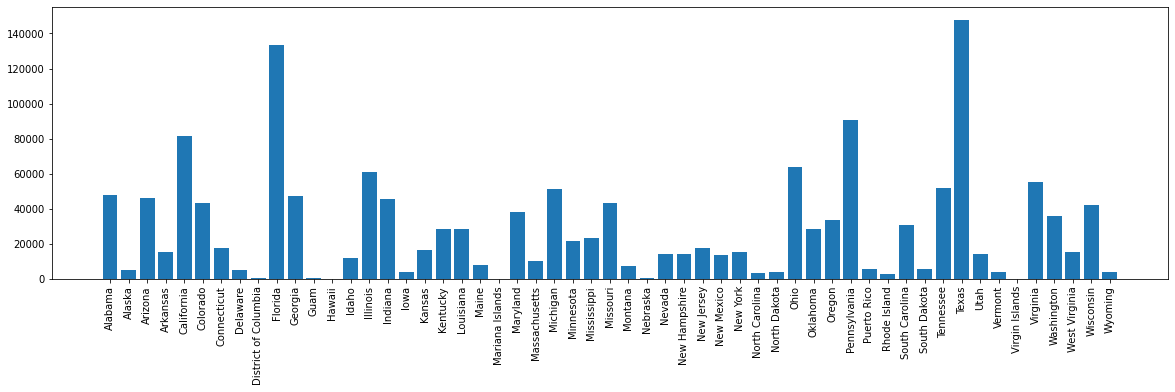

In [ ]:

 plt.figure(figsize=(20, 5))

 plt.bar(df.state,df.handgun)
 plt.xticks(rotation=90)

 plt.legend


This Shows Florida and Texas has the most amount of Handgun permit checks in the US however this is a try run


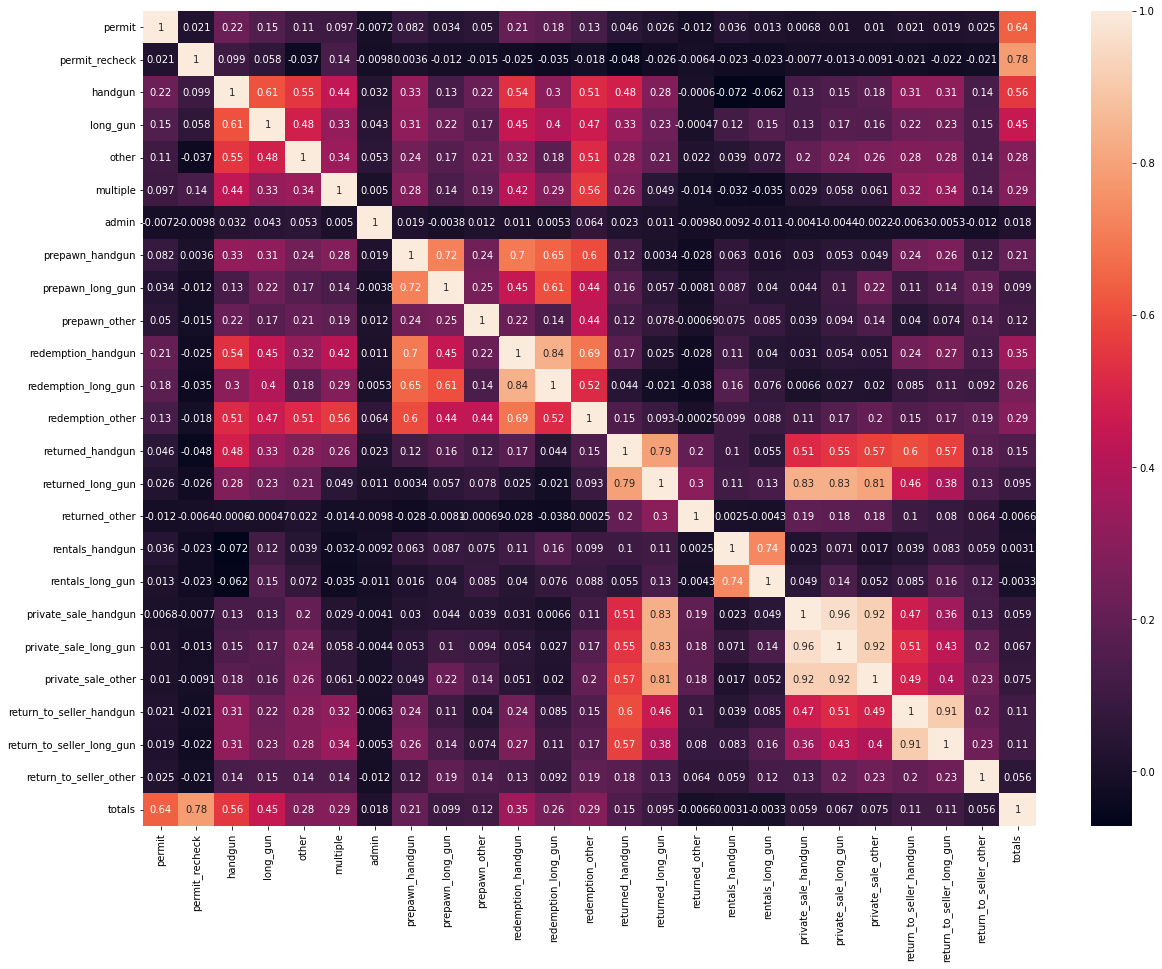

In [37]:
corr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)


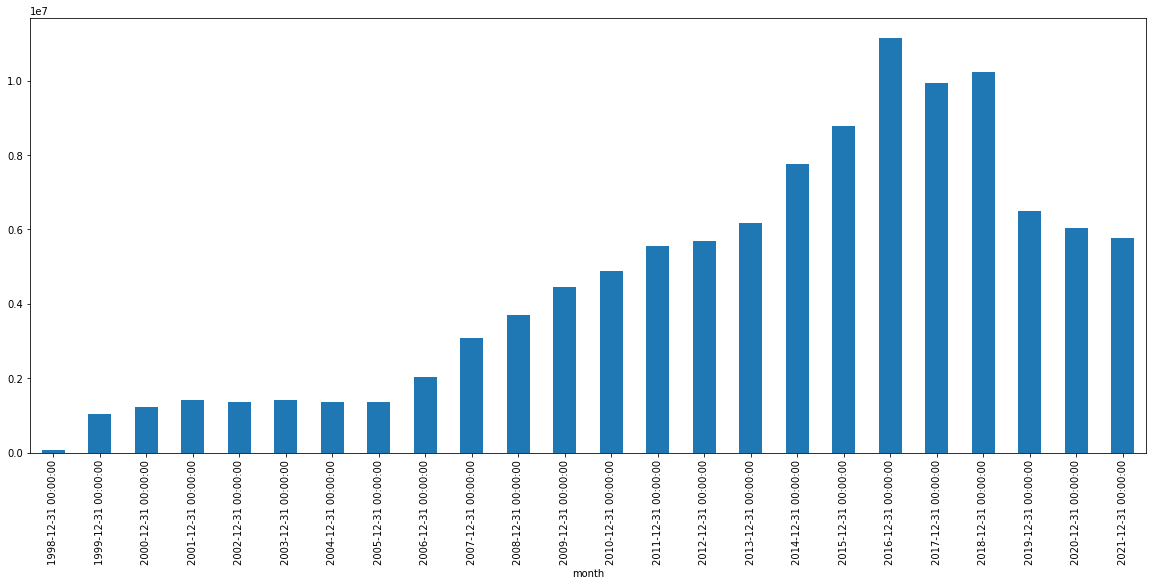

In [55]:
df.month=pd.to_datetime(df.month)
plt.figure(figsize=(20,8))
dt=df.groupby(pd.Grouper(key='month',freq='1Y'))['permit'].sum()

dt.plot(kind='bar')


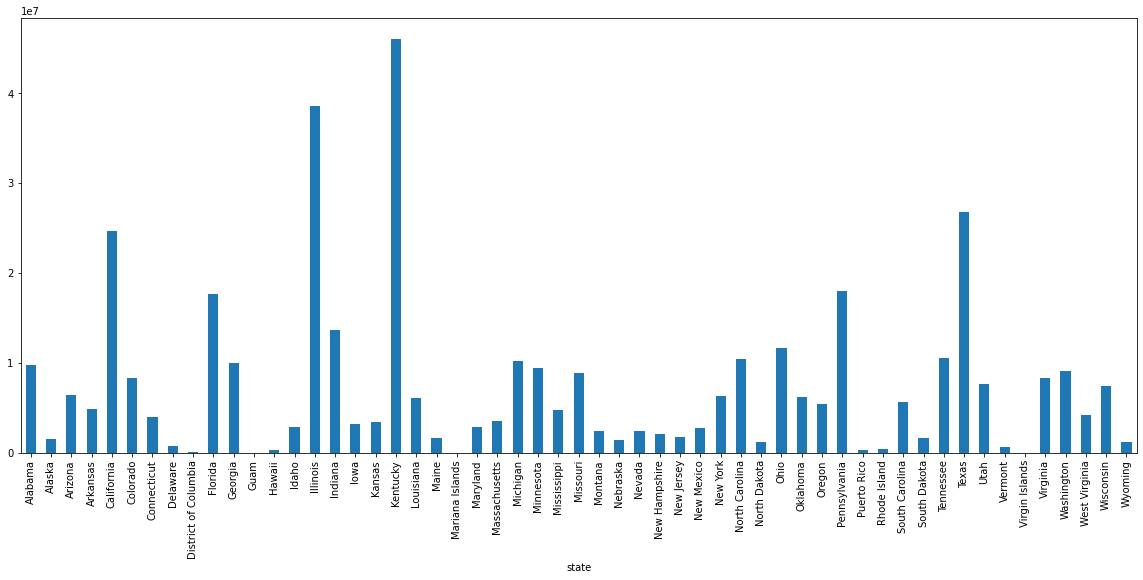

In [16]:
plt.figure(figsize=(20,8))
dtt=df.groupby('state')['totals'].sum();
dtt.plot(kind='bar')


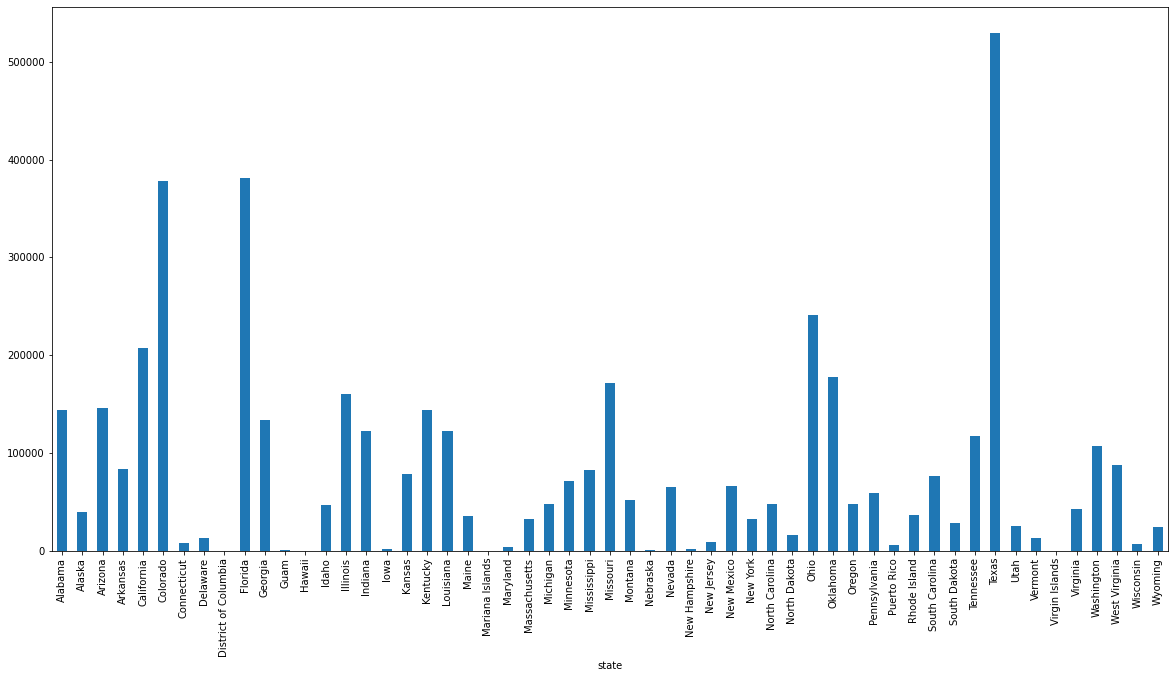

In [19]:
plt.figure(figsize=(20,10))
dt1=df.groupby('state')['multiple'].sum()
dt1.plot(kind='bar')

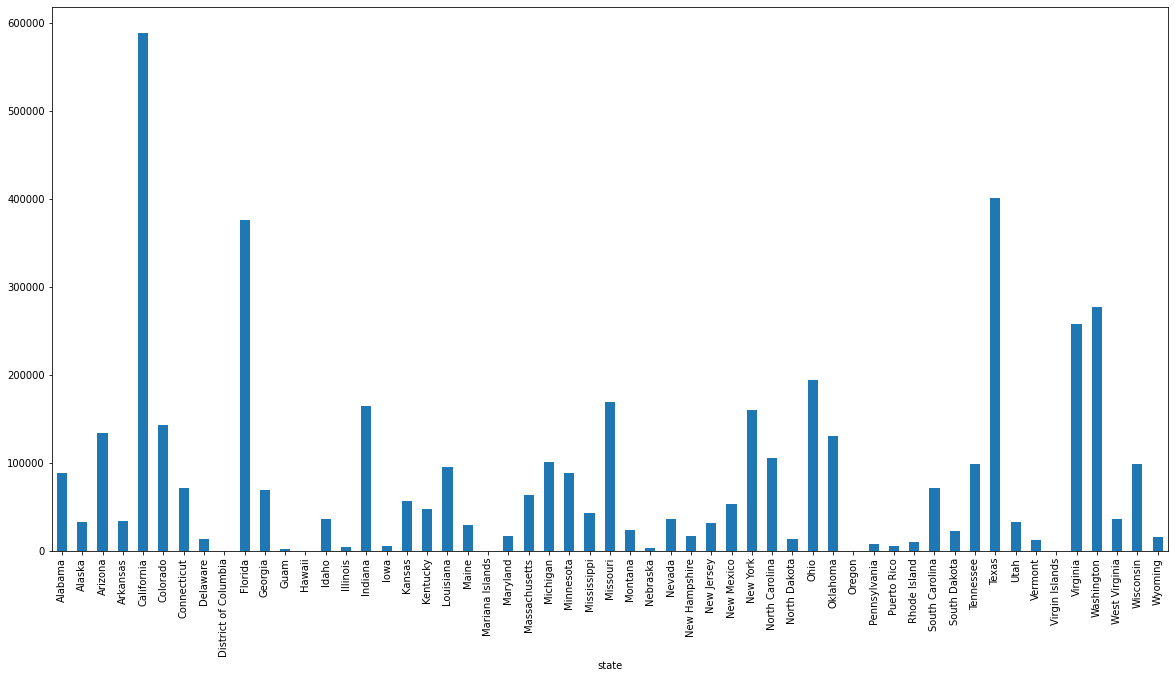

In [20]:
plt.figure(figsize=(20,10))
dt1=df.groupby('state')['other'].sum()
dt1.plot(kind='bar')

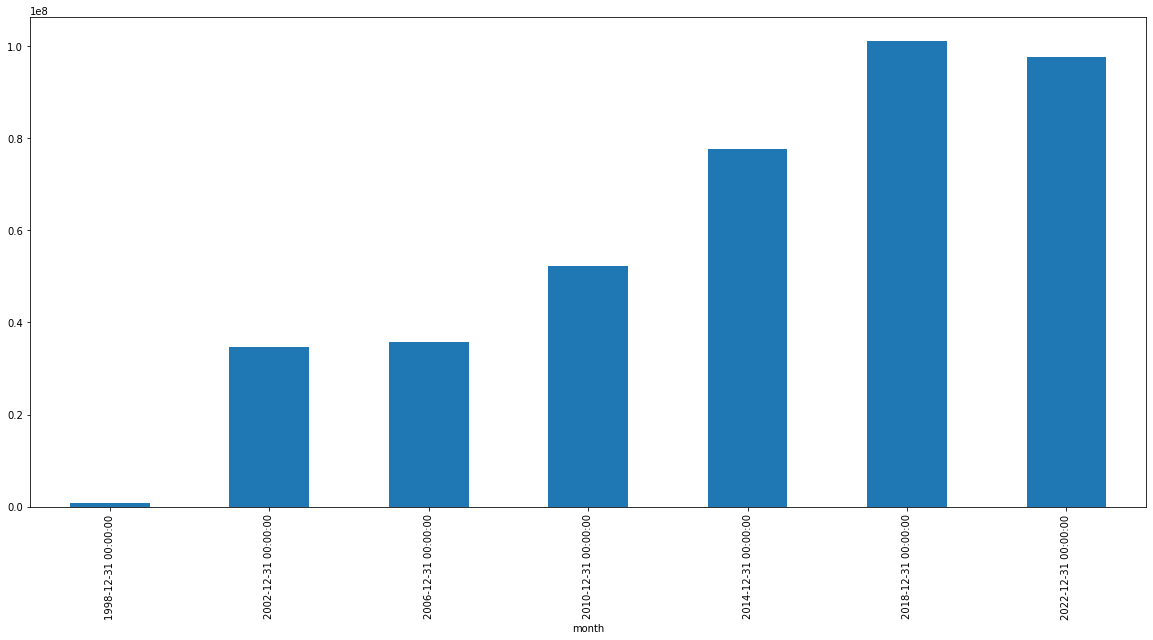

In [35]:
plt.figure(figsize=(20,9))
dt2=df.groupby(pd.Grouper(key='month',freq='4Y'))['totals'].sum()
dt2.plot(kind='bar')

In [28]:
dt2.head(40)

Series([], Freq: M, Name: totals, dtype: int64)

In [29]:
dt2.head(
    
)

Series([], Freq: M, Name: totals, dtype: int64)

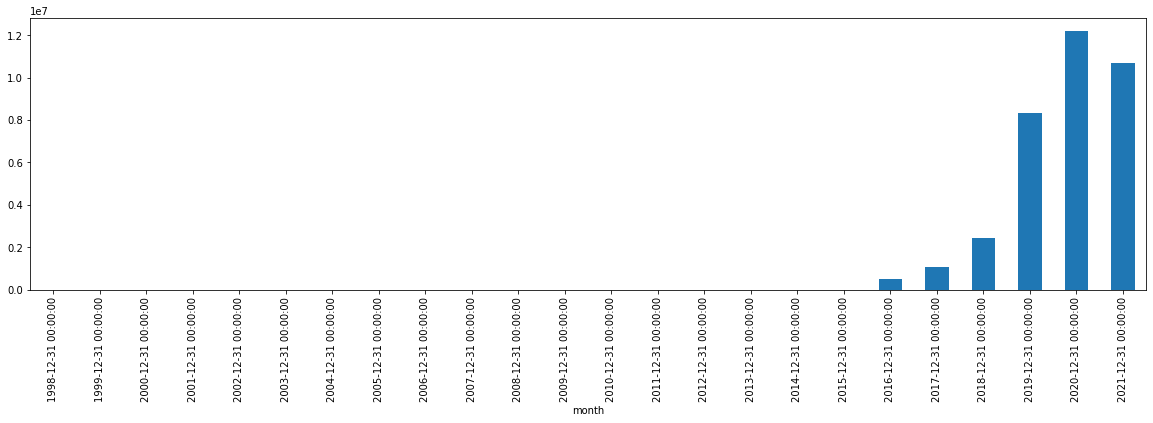

In [58]:
plt.figure(figsize=(20,5))
dt2=df.groupby(pd.Grouper(key='month',freq='1Y'))['permit_recheck'].sum()
dt2.plot(kind='bar')

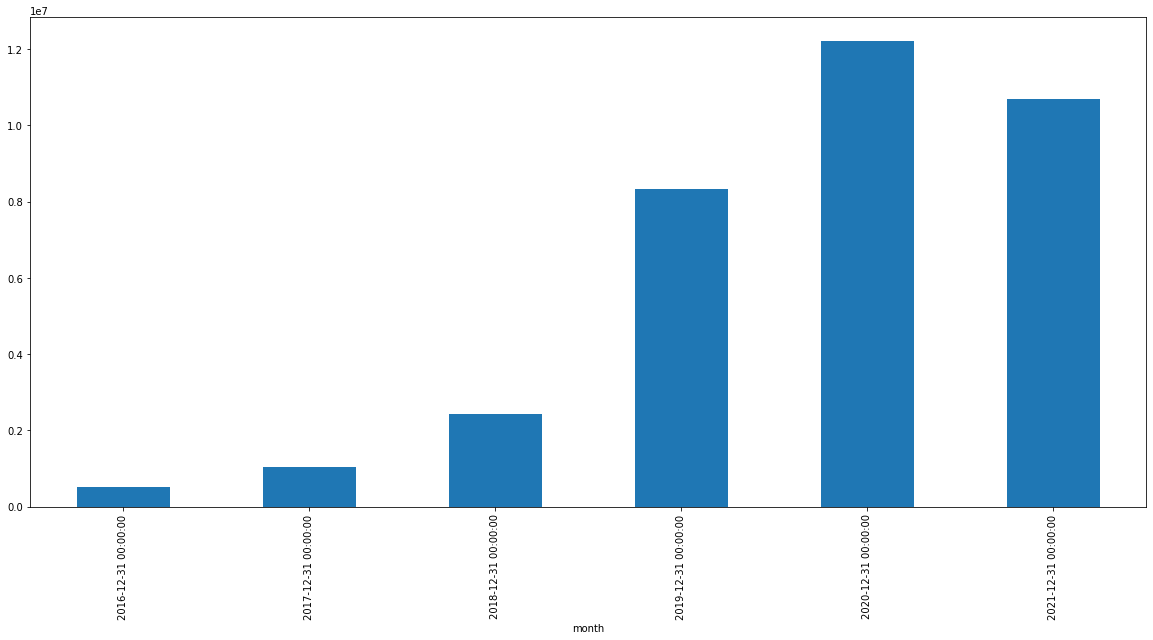

In [49]:
  plt.figure(figsize=(20,9))
dt2=df.groupby(pd.Grouper(key='month',freq='1Y'))['permit_recheck'].sum()
dt2.plot(kind='bar')

In [60]:
dts=df
dts.isnull().sum()

month                            0
state                            0
permit                           0
permit_recheck               11359
handgun                          0
long_gun                         0
other                         6959
multiple                         0
admin                            0
prepawn_handgun               1920
prepawn_long_gun              1922
prepawn_other                 7344
redemption_handgun            1917
redemption_long_gun           1918
redemption_other              7344
returned_handgun             10261
returned_long_gun            10316
returned_other               10644
rentals_handgun              11469
rentals_long_gun             11634
private_sale_handgun          9709
private_sale_long_gun         9709
private_sale_other            9709
return_to_seller_handgun      9984
return_to_seller_long_gun     9709
return_to_seller_other       10204
totals                           0
dtype: int64

In [64]:
dts=dts[~dts.permit_recheck.isnull()].copy()
dts.isnull().sum()

month                          0
state                          0
permit                         0
permit_recheck                 0
handgun                        0
long_gun                       0
other                          0
multiple                       0
admin                          0
prepawn_handgun                0
prepawn_long_gun               0
prepawn_other                  0
redemption_handgun             0
redemption_long_gun            0
redemption_other               0
returned_handgun               0
returned_long_gun              0
returned_other                 0
rentals_handgun              330
rentals_long_gun             330
private_sale_handgun           0
private_sale_long_gun          0
private_sale_other             0
return_to_seller_handgun       0
return_to_seller_long_gun      0
return_to_seller_other         0
totals                         0
dtype: int64

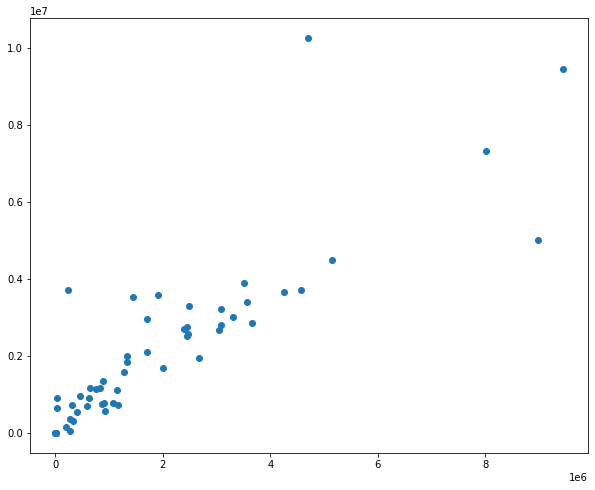

In [66]:
plt.figure(figsize=(10,8))
dt3=df.groupby('state')['handgun'].sum()
dtd=df.groupby('state')['long_gun'].sum()
plt.scatter(dt3,dtd)
plt.show()



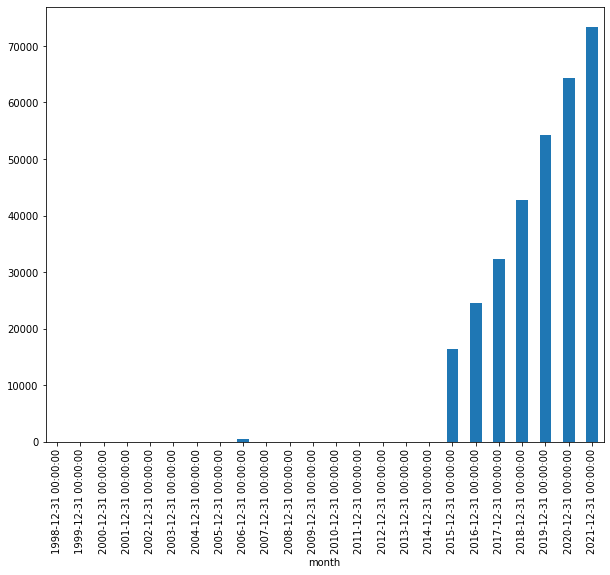

In [70]:
plt.figure(figsize=(10,8))

dt5=df.groupby(pd.Grouper(key='month',freq='1Y'))['returned_handgun'].sum()
dt5.plot(kind='bar')

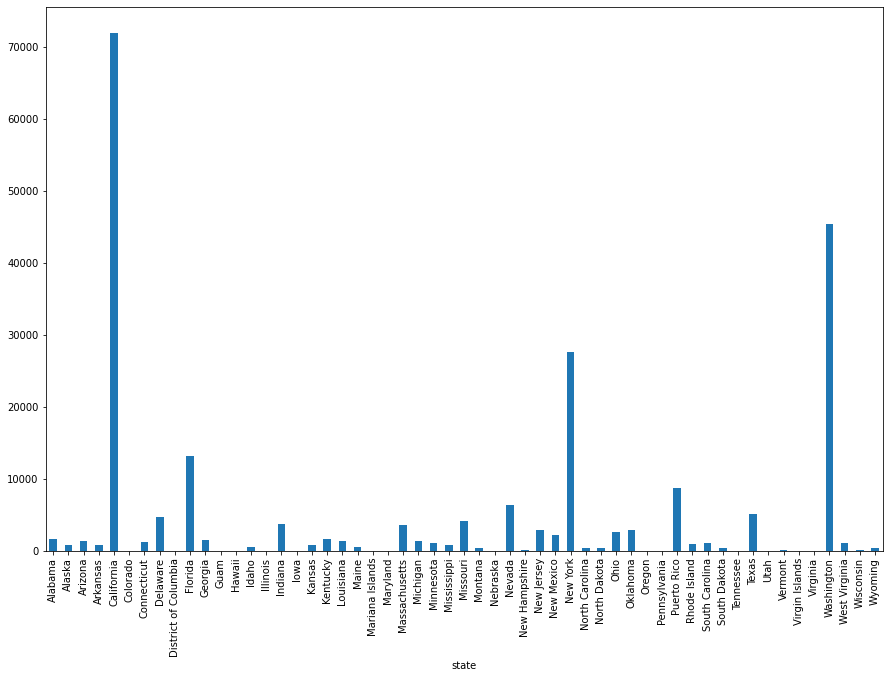

In [77]:
plt.figure(figsize=(15,10))
dt6=df.groupby('state')['private_sale_handgun'].sum()
dt6.plot(kind="bar")
